# Customer Lifetime Value

Customer Lietime value is a prediction of how much revenue a customer can make for a business during the course of his entire life. Say for example, if I am a regular customer at McDonalds, I may be providing them with around 2000 rupees per month. So if this trend continues, and say hypothetically I do this for 10 months, then by a prediction, over the course of 2 years, I'll be making them 48000 rupees. Obviously the values and scenario I used is an ideal one, ideal in the sense that obviously I won't be providing them with 2000 rupees every month, it might be more or less than that. 

Now why would McDonalds need this value of 48000 rupees of mine ?

Well there is no guarantee that I will be eating at one of their outlets even after the tenth month. I might go to burger king, or maybe burger singh if I had an accident and hit my head really hard, because they might be offering a better value burger for my bucks. So overall when I could be contributing as towards higher revenues, mcdonalds might loose me because well they didn't give me attention (Yeah it's not just limited to relationships anymore !)!

So what can they do ? Well give me offers, focus on me, provide me with their attention, give me coupons as a token of appreciation to play with my emotions to get that maximum revenue generated.

Obviously, if I have less Customer Lifetime Value, investing time and money on me may not lead to the most profitab le scenario for a business. 

So hopefully you get an idea as to why CLV is important !

You can find the data from kaggle here : https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data/downloads/ibm-watson-marketing-customer-value-data.zip/1

In [1]:
import pandas as pd

In [11]:
lifetime = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [12]:
lifetime.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
lifetime.shape

(9134, 24)

In [15]:
lifetime.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [24]:
lifetime = lifetime[['Customer', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value']]

Let's find out how many columns are actually related to our Customer Lifetime Value column 

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

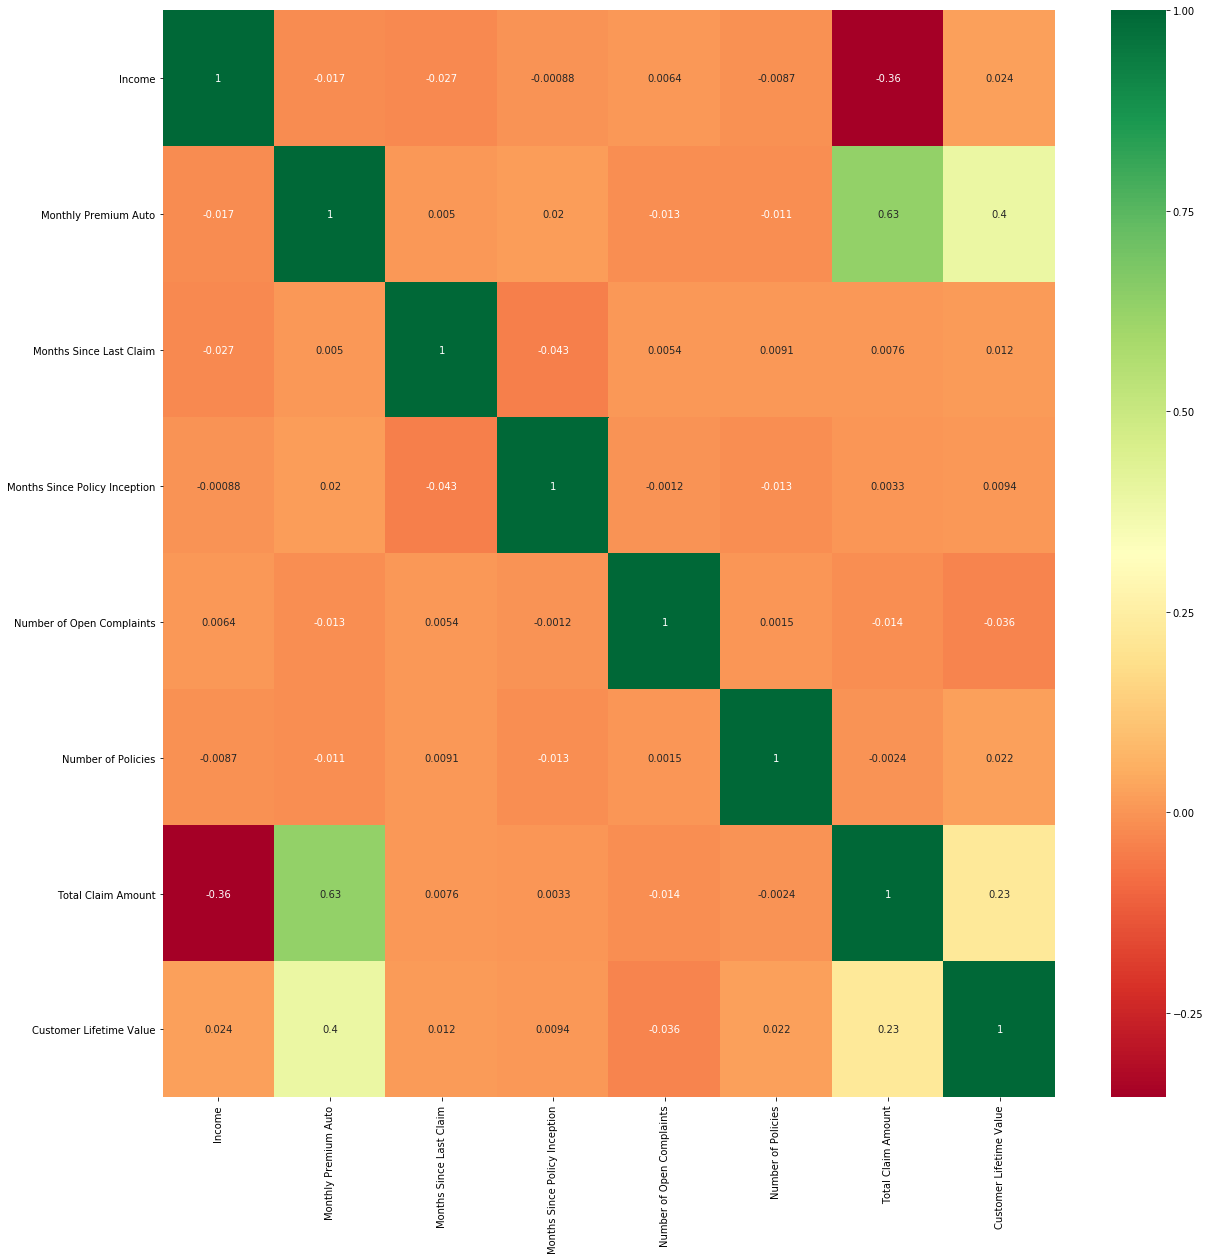

In [25]:
sns.heatmap(lifetime.corr(), annot =True, cmap='RdYlGn')
f = plt.gcf()
f.set_size_inches(20,20) #If only it was that easy to set size in inches in real life, not saying I have a problem

There is a high correlation between monthly premium auto, total auto claim with Customer Lifetime Value

Remember these are only the numerical columns we have found the correlation with. Let's dig into remaining columns

'Customer', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value'

The above are the columns that remain when removing less/uncorrelated numerical columns from the dataset

Now by intuition, there are certain columns, which to me appear ridiculous to be used and I'll be removing them straight away (Effective To Date, Location Code, Sales Channel)

In [26]:
lifetime2 = lifetime[['Customer', 'State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Monthly Premium Auto', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value']]

Now let's analyse how much informative these columns are going to be

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


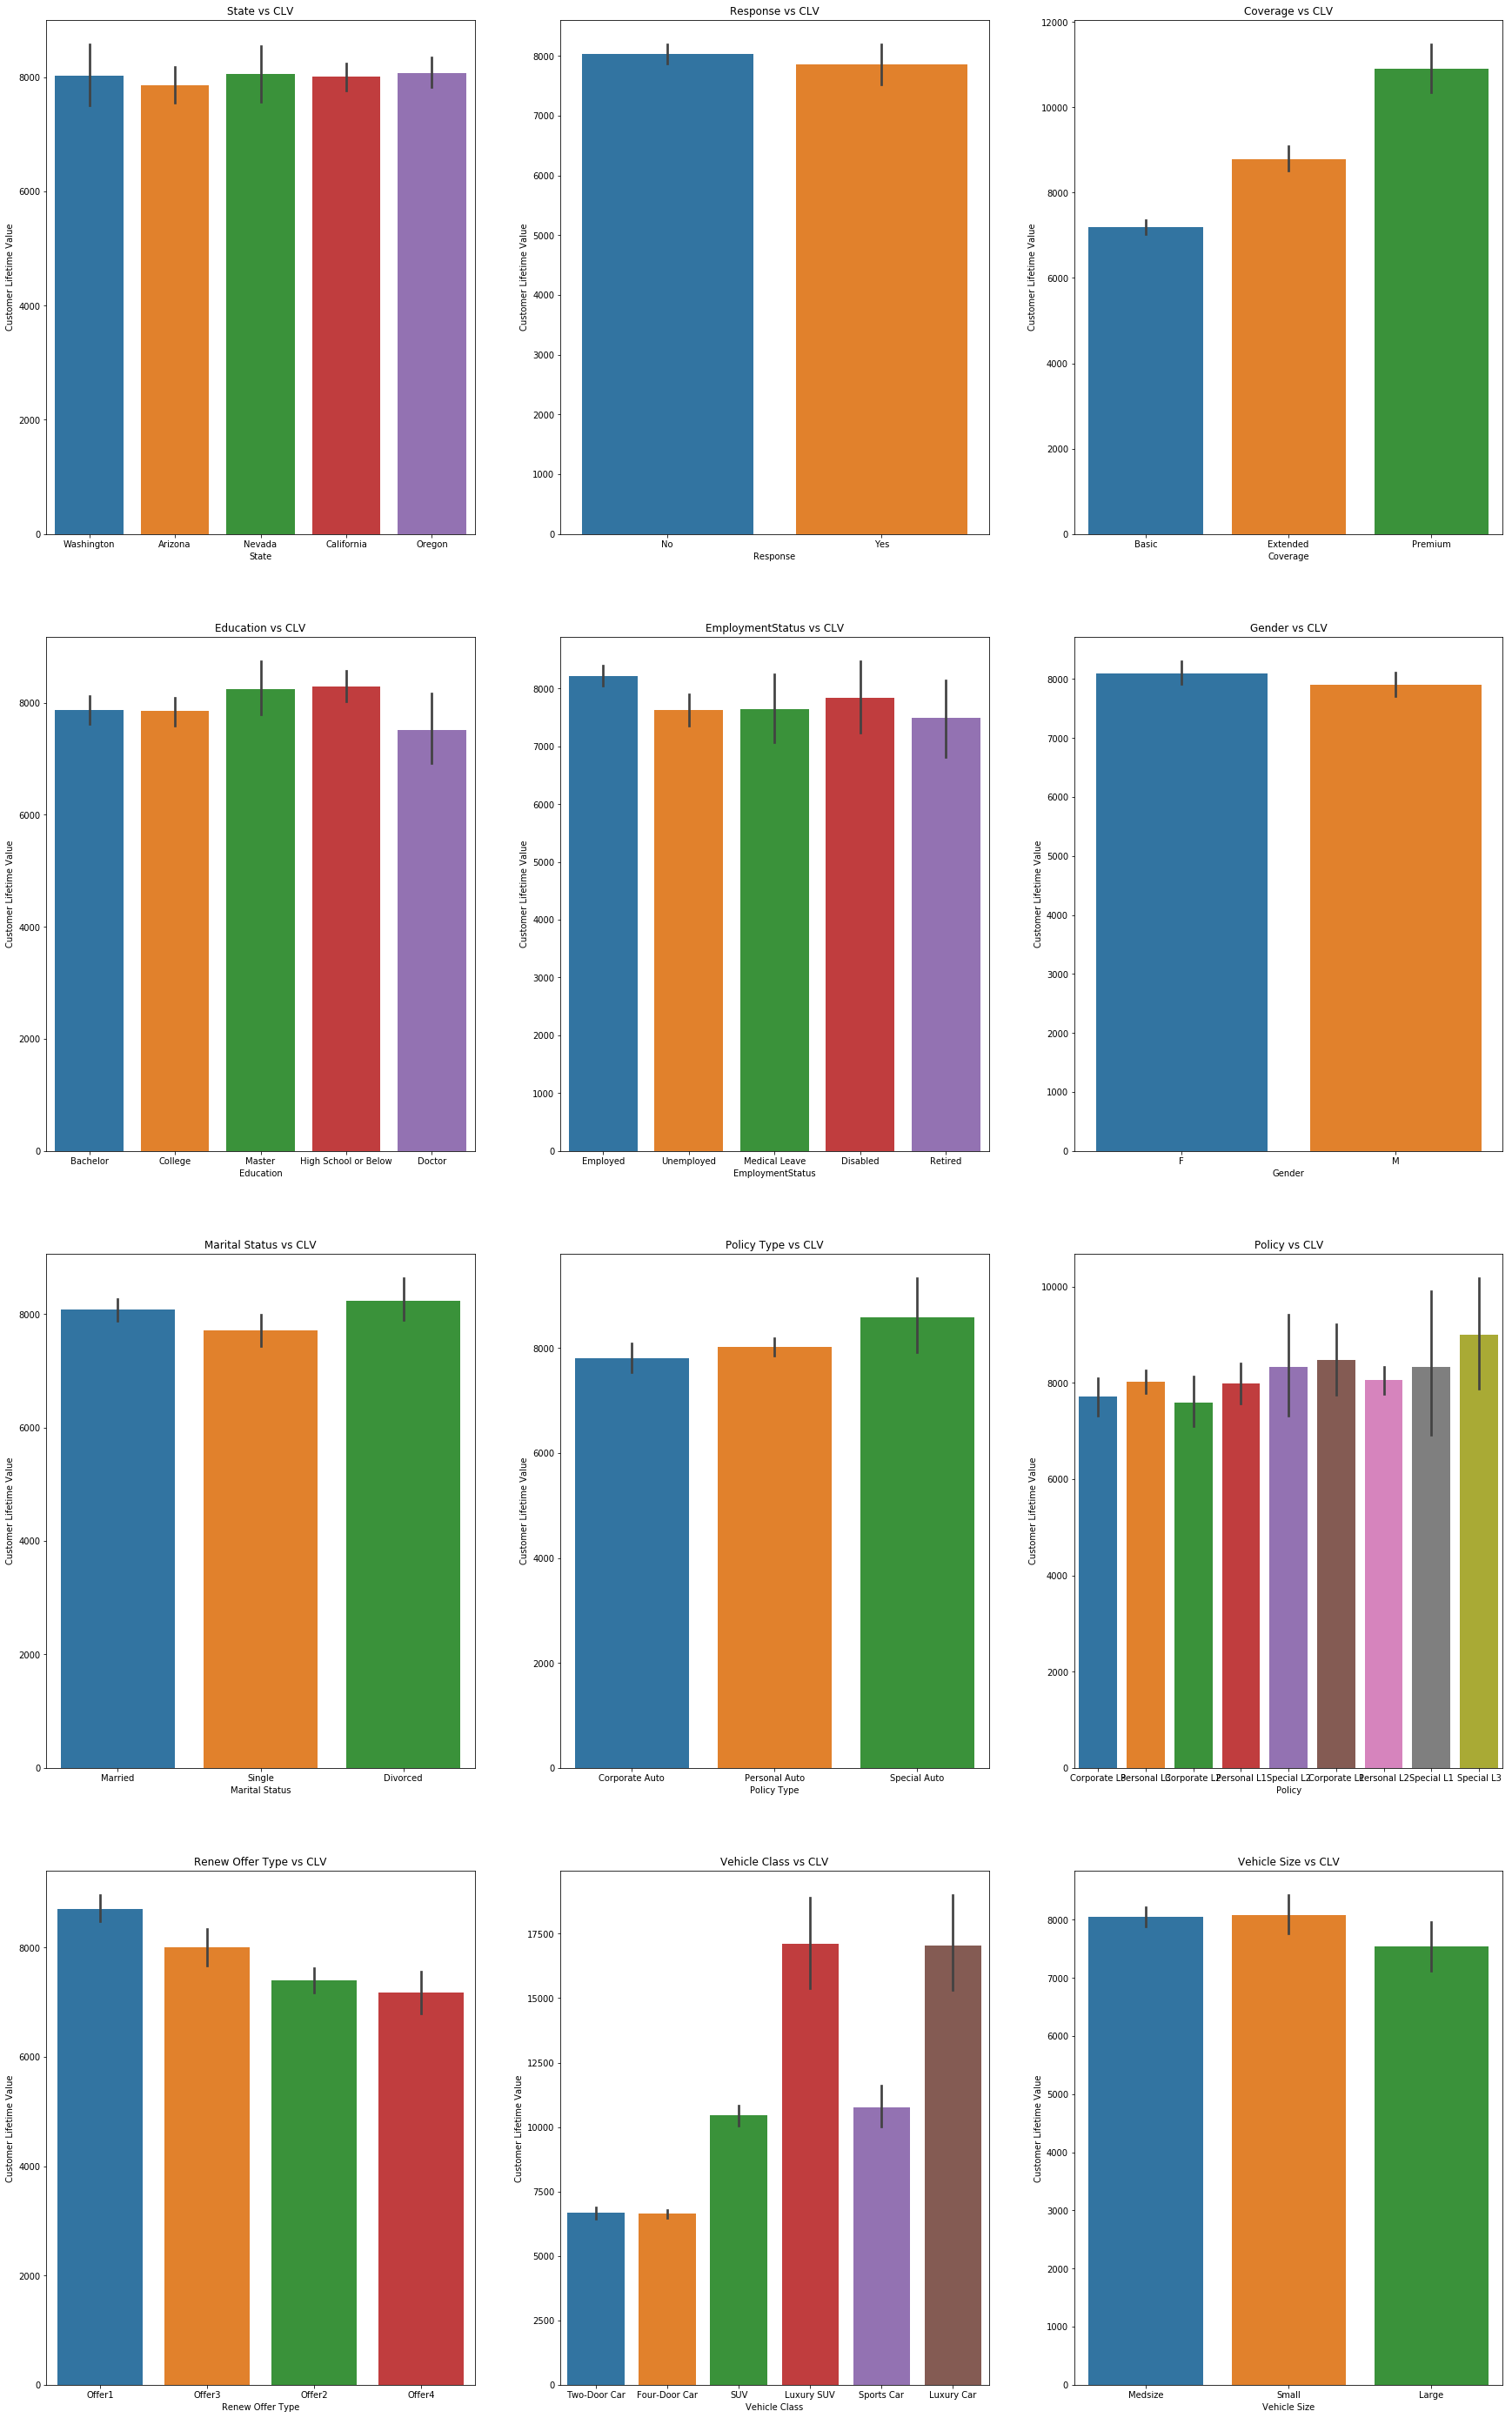

In [44]:
f,ax = plt.subplots(4,3,figsize=(30,50))
i=0
j=0
for col in lifetime2.columns:
    if j==3:
        i=i+1
        j=0
    if col not in ['Customer Lifetime Value','Total Claim Amount','Monthly Premium Auto','Customer'] :
        sns.barplot(col,'Customer Lifetime Value',data=lifetime2,ax=ax[i,j])
        ax[i,j].set_title(col+' vs CLV')
        j=j+1
       

So from the barplots above, Vehicle class and coverage as clv are the only categorical columns that provide enough information to be used for our predictive model.

Let's convert these to integers for building our model

In [50]:
df = pd.get_dummies(lifetime2, columns=['Coverage','Vehicle Class'])

In [52]:
df.head()

,Customer,State,Response,Education,EmploymentStatus,Gender,Marital Status,Monthly Premium Auto,Policy Type,Policy,...,Customer Lifetime Value,Coverage_Basic,Coverage_Extended,Coverage_Premium,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,BU79786,Washington,No,Bachelor,Employed,F,Married,69,Corporate Auto,Corporate L3,...,2763.519279,1,0,0,0,0,0,0,0,1
1,QZ44356,Arizona,No,Bachelor,Unemployed,F,Single,94,Personal Auto,Personal L3,...,6979.535903,0,1,0,1,0,0,0,0,0
2,AI49188,Nevada,No,Bachelor,Employed,F,Married,108,Personal Auto,Personal L3,...,12887.431650,0,0,1,0,0,0,0,0,1
3,WW63253,California,No,Bachelor,Unemployed,M,Married,106,Corporate Auto,Corporate L2,...,7645.861827,1,0,0,0,0,0,1,0,0
4,HB64268,Washington,No,Bachelor,Employed,M,Single,73,Personal Auto,Personal L1,...,2813.692575,1,0,0,1,0,0,0,0,0


In [53]:
df = df[['Coverage_Basic','Coverage_Extended','Coverage_Premium','Vehicle Class_Four-Door Car','Vehicle Class_Luxury Car','Vehicle Class_Luxury SUV','Vehicle Class_SUV','Vehicle Class_Sports Car','Vehicle Class_Two-Door Car','Monthly Premium Auto','Total Claim Amount','Customer Lifetime Value']]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1:])

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()

In [60]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
model.score(x_test,y_test)

0.15737256793602317

That's quite low !

In [62]:
df2 = df [['Monthly Premium Auto','Total Claim Amount','Customer Lifetime Value']]

In [63]:
x_train,x_test,y_train,y_test = train_test_split(df2.iloc[:,:-1],df2.iloc[:,-1:])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.16081105912075289

I'll be working on this notebook to improve the score since currently it is unacceptable.